# Forest plots for quantitative and binary regenie results
Forest plots can be generated for both binary and quantitative results.
See data/examples for formatted regenie output files
Everything here is hacky and use at your own peril

In [42]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from results import pheno_search, pval_stars, plot_BT, plot_QT

Path("../tmp").resolve().mkdir(parents=True, exist_ok=True)

In [85]:
# Flags

GENE = "MC4R"
TRAIT = "QT"
PHENOTYPE = "metabolic"
AAF = "all"
TEST="ADD"

In [86]:
# Results files

files = [
    f"file:/mnt/project/Data/results/{PHENOTYPE}.{TRAIT}.{GENE}/{file}"
    for file in os.listdir(f"/mnt/project/Data/results/{PHENOTYPE}.{TRAIT}.{GENE}")
    if file.endswith(".regenie")
]

# Field codings
ukb_coding = pd.read_csv(
    "/opt/notebooks/gogoGPCR/data/misc/Data_Dictionary_Showcase.csv",
    error_bad_lines=False,
    warn_bad_lines=False,
    quotechar='"',
    usecols=["FieldID", "Field"],
)

custom_coding = pd.read_csv(
    "/opt/notebooks/gogoGPCR/data/misc/Data_Dictionary_Custom.csv",
    error_bad_lines=False,
    warn_bad_lines=False,
    quotechar='"',
)

In [87]:
# Load raw DF

df_raw = pd.read_csv(files[0], delimiter=" ", header="infer", comment="#").assign(
    SOURCE=os.path.basename(files[0])
)
df_raw = pd.concat(
    [df_raw]
    + [
        pd.read_csv(fp, delimiter=" ", comment="#").assign(SOURCE=os.path.basename(fp))
        for fp in files[1:]
    ],
    axis=0,
)

In [88]:
# Fix common fields
df = df_raw
df.loc[:, "GENE"] = df.ID.apply(lambda x: x.split(".")[0])
df.loc[:, "MASK"] = df.ALLELE1.apply(lambda x: x.split(".", maxsplit=2)[0])
df.loc[:, "AAF"] = df.ALLELE1.apply(lambda x: x.split(".", maxsplit=1)[-1])
df.loc[:, "TRAIT"] = TRAIT  # df.FILE.apply(lambda x: x[0])
df.loc[:, "PHENO"] = df.SOURCE.apply(lambda x: x.split("_")[-1].split(".")[0])
df = df.loc[df.TEST.eq(TEST),:]
df = df.drop(["ID", "ALLELE0", "ALLELE1", "EXTRA", "SOURCE", "TEST"], axis=1)

# Filter AAF
if not AAF:
    AAF = df.AAF.max()

df = df.loc[df.AAF == AAF, :]

# Sanity check
df

,CHROM,GENPOS,A1FREQ,N,BETA,SE,CHISQ,LOG10P,GENE,MASK,AAF,TRAIT,PHENO
5,18,60371355,0.000620,399712,0.010759,0.043204,0.062020,0.095106,MC4R,eve_bad,all,QT,102
11,18,60371355,0.035794,399712,-0.015007,0.005854,6.571050,1.984430,MC4R,eve_good,all,QT,102
17,18,60371355,0.036910,399712,-0.014400,0.005773,6.221290,1.898860,MC4R,missense,all,QT,102
23,18,60371355,0.001147,399712,0.016736,0.031809,0.276839,0.222732,MC4R,synonymous,all,QT,102
29,18,60371355,0.000238,399712,-0.119489,0.069780,2.932230,1.061340,MC4R,lof,all,QT,102
5,18,60371355,0.000612,425084,0.326390,0.040483,65.003600,15.126300,MC4R,eve_bad,all,QT,21001
11,18,60371355,0.035842,425084,-0.065514,0.005443,144.847000,32.634700,MC4R,eve_good,all,QT,21001
17,18,60371355,0.036974,425084,-0.058993,0.005367,120.804000,27.374900,MC4R,missense,all,QT,21001
23,18,60371355,0.001157,425084,0.001567,0.029460,0.002829,0.018825,MC4R,synonymous,all,QT,21001
29,18,60371355,0.000242,425084,0.541458,0.064295,70.920700,16.429600,MC4R,lof,all,QT,21001


In [89]:
# Filters
bt = df.TRAIT == "BT"
qt = df.TRAIT == "QT"

# Fix Binary Traits
df.loc[bt, "OR"] = np.exp(df.loc[bt, "BETA"])
df.loc[bt, "OR_up"] = np.exp(df.loc[bt, "BETA"] + df.loc[bt, "SE"])
df.loc[bt, "OR_low"] = np.exp(df.loc[bt, "BETA"] - df.loc[bt, "SE"])
df.loc[bt, "OR_up_lim"] = df.loc[bt, "OR_up"] - df.loc[bt, "OR"]
df.loc[bt, "OR_low_lim"] = df.loc[bt, "OR"] - df.loc[bt, "OR_low"]

# Fix Quantitative Traits
df.loc[qt, "BETA_up_lim"] = df.loc[qt, "BETA"] + df.loc[qt, "SE"]
df.loc[qt, "BETA_low_lim"] = df.loc[qt, "BETA"] - df.loc[qt, "SE"]

# Final fixes
df.loc[:, "Phenotype"] = df.PHENO.apply(
    lambda x: pheno_search(x, ukb_coding, custom_coding).replace('"', "").strip()
)
df.loc[:, "pval"] = np.power(10, -df["LOG10P"])
df.loc[:, "pval_stars"] = df["pval"].apply(lambda x: pval_stars(x))
df.loc[:, "N_pos"] = (2 * df["N"] * df["A1FREQ"]).astype(int)

# Singletons
df = df.loc[df.AAF != "singleton", :]
print(len(df))
df.head()

55


,CHROM,GENPOS,A1FREQ,N,BETA,SE,CHISQ,LOG10P,GENE,MASK,...,OR_up,OR_low,OR_up_lim,OR_low_lim,BETA_up_lim,BETA_low_lim,Phenotype,pval,pval_stars,N_pos
5,18,60371355,0.000620,399712,0.010759,0.043204,0.062020,0.095106,MC4R,eve_bad,...,NaN,NaN,NaN,NaN,0.053964,-0.032445,"Pulse rate, automated reading",0.803331,,496
11,18,60371355,0.035794,399712,-0.015007,0.005854,6.571050,1.984430,MC4R,eve_good,...,NaN,NaN,NaN,NaN,-0.009153,-0.020861,"Pulse rate, automated reading",0.010365,*,28614
17,18,60371355,0.036910,399712,-0.014400,0.005773,6.221290,1.898860,MC4R,missense,...,NaN,NaN,NaN,NaN,-0.008627,-0.020174,"Pulse rate, automated reading",0.012622,*,29506
23,18,60371355,0.001147,399712,0.016736,0.031809,0.276839,0.222732,MC4R,synonymous,...,NaN,NaN,NaN,NaN,0.048545,-0.015072,"Pulse rate, automated reading",0.598781,,917
29,18,60371355,0.000238,399712,-0.119489,0.069780,2.932230,1.061340,MC4R,lof,...,NaN,NaN,NaN,NaN,-0.049709,-0.189269,"Pulse rate, automated reading",0.086828,,189


In [90]:
phenos_to_remove = []

plt_df = (
    df.loc[(df.GENE == GENE)]
    .sort_values(by=["Phenotype", "AAF"], ascending=[True, False])  # , "AAF"
    .groupby(["Phenotype", "MASK"])
    .first()
    .reset_index()
)

plt_df = plt_df.loc[~plt_df.Phenotype.astype(str).isin(phenos_to_remove), :]

effect = {"BT": "OR", "QT": "BETA"}[TRAIT]

group_by_mean = (
    pd.DataFrame({"mean": plt_df.groupby(["Phenotype"]).agg("mean")[effect]})
    .sort_values(by="mean", ascending=False)
    .reset_index()
)

sorter = group_by_mean.Phenotype.tolist()

plt_df.loc[:, "Phenotype"] = plt_df.loc[:, "Phenotype"].astype("category")
plt_df.loc[:, "Phenotypes"] = plt_df.loc[:, "Phenotype"].cat.set_categories(sorter)

plt_df = plt_df.sort_values(
    by=["Phenotype", "MASK"], ascending=[True, False]
).reset_index(drop=True)

phenotypes = plt_df.Phenotype.unique()

print(len(plt_df))
plt_df.head()

55


,Phenotype,MASK,CHROM,GENPOS,A1FREQ,N,BETA,SE,CHISQ,LOG10P,...,OR_up,OR_low,OR_up_lim,OR_low_lim,BETA_up_lim,BETA_low_lim,pval,pval_stars,N_pos,Phenotypes
0,Body fat percentage,synonymous,18,60371355,0.001158,418922,0.011978,0.022681,0.278877,0.223707,...,NaN,NaN,NaN,NaN,0.034659,-0.010704,5.974382e-01,,969,Body fat percentage
1,Body fat percentage,missense,18,60371355,0.036972,418922,-0.037646,0.004133,82.969500,19.079200,...,NaN,NaN,NaN,NaN,-0.033513,-0.041779,8.332973e-20,****,30977,Body fat percentage
2,Body fat percentage,lof,18,60371355,0.000240,418922,0.309651,0.049755,38.731800,9.313170,...,NaN,NaN,NaN,NaN,0.359406,0.259896,4.862168e-10,****,200,Body fat percentage
3,Body fat percentage,eve_good,18,60371355,0.035847,418922,-0.041269,0.004191,96.951800,22.148500,...,NaN,NaN,NaN,NaN,-0.037077,-0.045460,7.103952e-23,****,30034,Body fat percentage
4,Body fat percentage,eve_bad,18,60371355,0.000612,418922,0.172608,0.031156,30.693600,7.519760,...,NaN,NaN,NaN,NaN,0.203764,0.141452,3.021621e-08,****,513,Body fat percentage


0    987   0.75 (0.56,1.03) p=3.58e-01     
1    31561 0.94 (0.89,1.0)  p=3.14e-01     
2    205   0.92 (0.46,1.83) p=9.03e-01     
3    30596 0.94 (0.89,1.0)  p=3.12e-01     
4    521   1.54 (1.0,2.36)  p=3.14e-01     
Name: label, dtype: object
5    987   0.99 (0.88,1.11) p=9.26e-01     
6    31561 0.94 (0.92,0.96) p=6.54e-03 **  
7                                       NaN
8                                       NaN
9    521   1.39 (1.2,1.6)   p=3.02e-02 *   
Name: label, dtype: object
10    987   1.1  (0.99,1.23) p=3.66e-01     
11    31561 0.93 (0.91,0.95) p=7.32e-04 *** 
12    205   1.95 (1.6,2.38)  p=1.62e-03 **  
13    30596 0.92 (0.9,0.94)  p=1.49e-04 *** 
14    521   1.33 (1.16,1.53) p=4.34e-02 *   
Name: label, dtype: object
15    987   1.01 (0.94,1.09) p=8.78e-01     
16    31561 0.98 (0.97,0.99) p=1.59e-01     
17    205   1.37 (1.16,1.61) p=5.70e-02     
18    30596 0.98 (0.96,0.99) p=1.04e-01     
19    521   1.17 (1.06,1.3)  p=1.22e-01     
Name: label, dtype: object
20

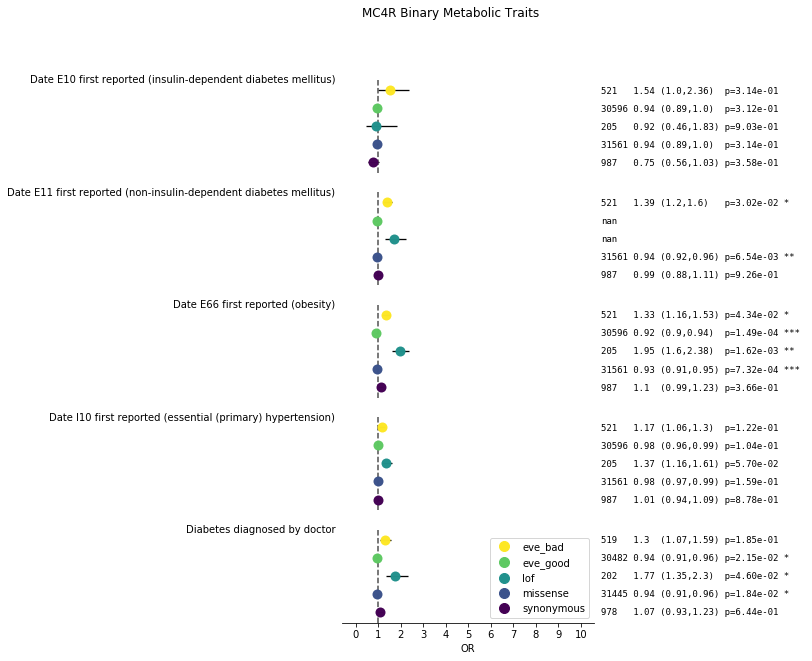

In [41]:
plot = plot_BT(
    plt_df, title=f"{GENE} Binary {PHENOTYPE.capitalize()} Traits", xlim=[0, 10]
)

plt.savefig(
    f"/opt/notebooks/gogoGPCR/tmp/{GENE}.{TRAIT}.{AAF}.{TEST}.svg",
    dpi=600,
    bbox_inches="tight",
    format="svg",
)

0    969   0.01 ± 0.02 p=5.97e-01     
1    30977 -0.04± 0.0  p=8.33e-20 ****
2    200   0.31 ± 0.05 p=4.86e-10 ****
3    30034 -0.04± 0.0  p=7.10e-23 ****
4    513   0.17 ± 0.03 p=3.02e-08 ****
Name: label, dtype: object
5    984   0.0  ± 0.03 p=9.58e-01     
6    31434 -0.06± 0.01 p=4.22e-28 ****
7    205   0.54 ± 0.06 p=3.72e-17 ****
8    30471 -0.07± 0.01 p=2.32e-33 ****
9    520   0.33 ± 0.04 p=7.48e-16 ****
Name: label, dtype: object
10    917   0.05 ± 0.03 p=1.10e-01     
11    29506 -0.01± 0.01 p=2.92e-01     
12    189   0.06 ± 0.07 p=3.53e-01     
13    28614 -0.0 ± 0.01 p=4.04e-01     
14    496   -0.04± 0.04 p=3.75e-01     
Name: label, dtype: object
15    918   -0.03± 0.03 p=3.80e-01     
16    29998 -0.02± 0.01 p=5.18e-05 ****
17    192   0.13 ± 0.06 p=3.62e-02 *   
18    29079 -0.02± 0.01 p=1.51e-05 ****
19    494   0.09 ± 0.04 p=2.19e-02 *   
Name: label, dtype: object
20    857   -0.03± 0.03 p=3.10e-01     
21    27571 0.03 ± 0.01 p=2.20e-11 ****
22    177   -0.04± 0.0

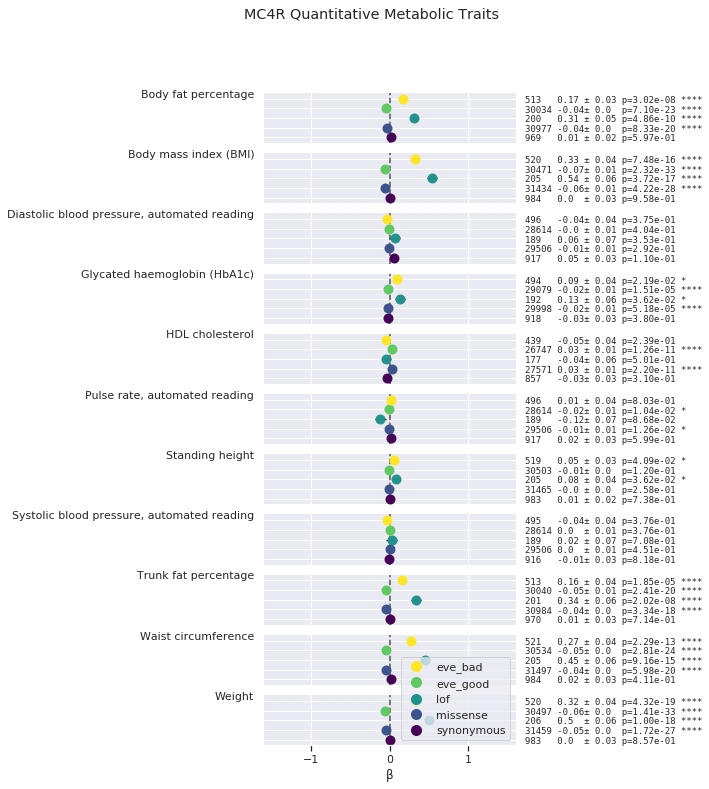

In [92]:

plot = plot_QT(
    plt_df,
    title=f"{GENE} Quantitative {PHENOTYPE.capitalize()} Traits",
    xlim=[-1, 1],
    height=12,
)


plt.savefig(
    f"/opt/notebooks/gogoGPCR/tmp/{GENE}.{TRAIT}.{AAF}.{TEST}.svg",
    dpi=600,
    bbox_inches="tight",
    format="svg",
)

In [83]:
plt_df.to_csv(f"/opt/notebooks/gogoGPCR/tmp/{GENE}.{TRAIT}.{AAF}.{TEST}.csv")

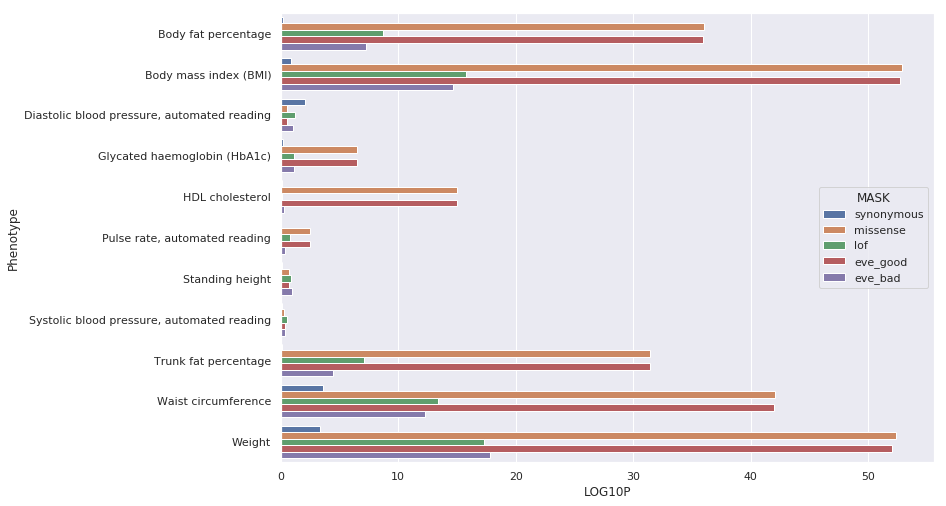

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=plt_df, y = "Phenotype", x = "LOG10P", hue = "MASK")
plt.savefig(f"/opt/notebooks/gogoGPCR/tmp/{GENE}.{TRAIT}.{AAF}.{TEST}.svg",
    dpi=600,
    bbox_inches="tight",
    format="svg")